# Regression w/ Normalization

**DataSet:**
* Regression with Auto-MPG data -- UCI dataset -- 398 data rows
* https://archive.ics.uci.edu/ml/datasets/auto+mpg

* The dataset is mentioned to have missing values
* Original 398 rows; 6 rows with missing values

In [2]:
def read_file_auto(filename):
    line_count = 0
    file_read = open(filename,"r")
    file_write = open("fixed-auto-mpg.csv","w")
    for line in iter(file_read):
        line_no_newline = line.rstrip()
        line_split = line_no_newline.split(",")
        if "?" in line_split:
            line_count += 1
#             print("Bad line number:",line_count)
            print(f"Line #{line_count} is Bad.  Data:{line}")
            continue  
        else:
            line_count += 1
            file_write.write(line)
    file_read.close()
    file_write.close()
    return

In [3]:
read_file_auto("auto-mpg.csv")

Line #34 is Bad.  Data:25,4,98,?,2046,19,71,1,ford pinto

Line #128 is Bad.  Data:21,6,200,?,2875,17,74,1,ford maverick

Line #332 is Bad.  Data:40.9,4,85,?,1835,17.3,80,2,renault lecar deluxe

Line #338 is Bad.  Data:23.6,4,140,?,2905,14.3,80,1,ford mustang cobra

Line #356 is Bad.  Data:34.5,4,100,?,2320,15.8,81,2,renault 18i

Line #376 is Bad.  Data:23,4,151,?,3035,20.5,82,1,amc concord dl



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('fixed-auto-mpg.csv') # deleted 6 rows with ? unknown data
print("Dataframe shape: ", df.shape,"\n") # 392 rows + header
display(df.head())

Dataframe shape:  (392, 9) 



,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [7]:
df = df.drop("origin", axis=1)
df = df.drop("name", axis=1)

In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [9]:
print(df[0:5])

    mpg  cylinders  displacement  horsepower  weight  acceleration  year
0  18.0          8         307.0         130    3504          12.0    70
1  15.0          8         350.0         165    3693          11.5    70
2  18.0          8         318.0         150    3436          11.0    70
3  16.0          8         304.0         150    3433          12.0    70
4  17.0          8         302.0         140    3449          10.5    70


In [10]:
print(df[-5:])

      mpg  cylinders  displacement  horsepower  weight  acceleration  year
387  27.0          4         140.0          86    2790          15.6    82
388  44.0          4          97.0          52    2130          24.6    82
389  32.0          4         135.0          84    2295          11.6    82
390  28.0          4         120.0          79    2625          18.6    82
391  31.0          4         119.0          82    2720          19.4    82


In [11]:
df.values[0:2]

array([[  18. ,    8. ,  307. ,  130. , 3504. ,   12. ,   70. ],
       [  15. ,    8. ,  350. ,  165. , 3693. ,   11.5,   70. ]])

In [13]:
df.columns.to_list()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year']

In [14]:
# Normalizing dfpr
from sklearn import preprocessing
float_array = df.values #.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df_normalized = pd.DataFrame(scaled_array, columns = ["mpg","cylinders","displacement","horsepower","weight","acceleration","year"])
print("Dataframe shape: ",df_normalized.shape,"\n") # 392 rows, 7 columns + header

Dataframe shape:  (392, 7) 



In [15]:
df_normalized[0:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0


In [16]:
df_normalized[-5:]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0
391,0.585106,0.2,0.131783,0.195652,0.313864,0.678571,1.0


/Users/sbalak/miniconda/envs/gis/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122a77a50>,
      dtype=object)

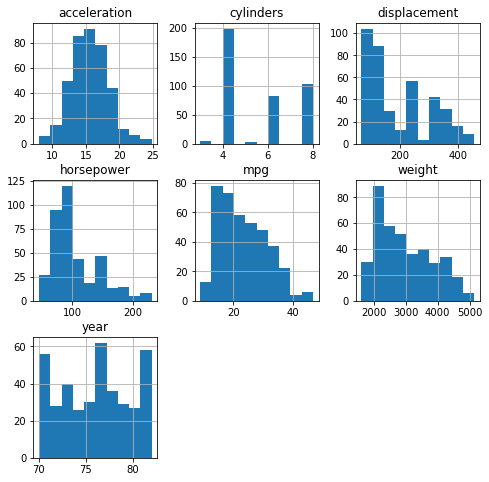

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax = ax)

/Users/sbalak/miniconda/envs/gis/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124f81790>,
      dtype=object)

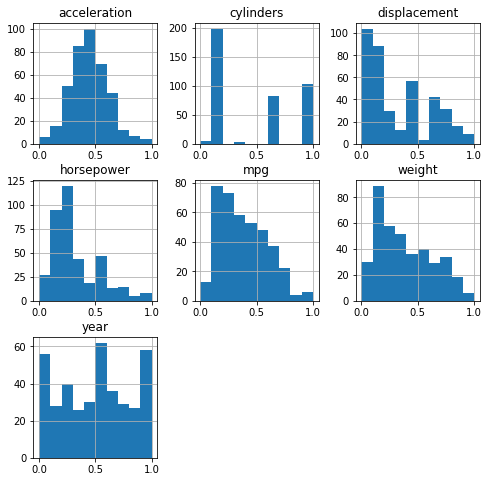

In [19]:
plt.close()
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df_normalized.hist(ax = ax)

In [37]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize = (8,8))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    labels = ["m","mpg","cylinders","displacement","horsepower","weight","acceleration","year"]
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    ax1.set_xticklabels(labels,fontsize=10,rotation=45)
    ax1.set_yticklabels(labels,fontsize=10)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

In [21]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


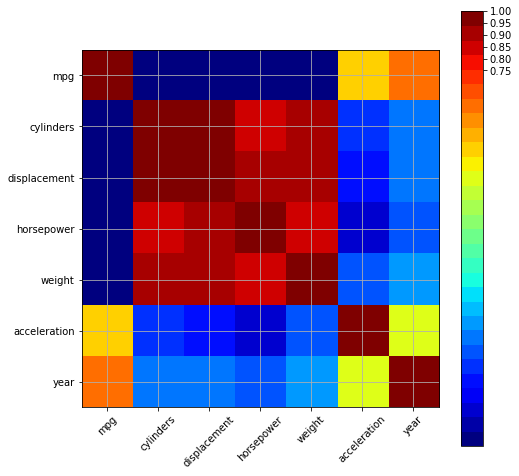

In [38]:
correlation_matrix(df) # original data

In [23]:
df_normalized.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


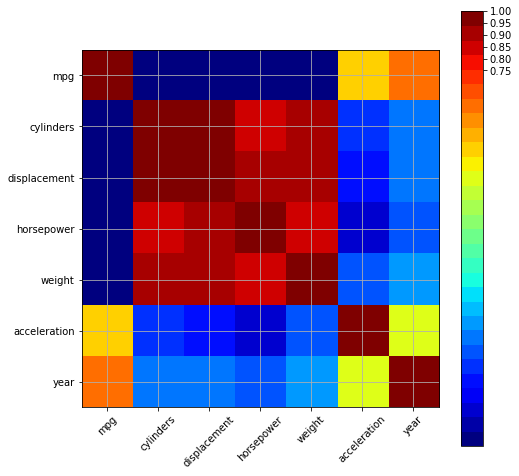

In [39]:
correlation_matrix(df_normalized) # normalized data

In [40]:
X = df_normalized.drop('mpg',axis=1)
y = df_normalized['mpg']

In [41]:
# Split data to training and test
from sklearn.model_selection import train_test_split
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("X_train shape: ",X_train.shape) # 294 rows, 6 columns
print("y_train shape: ",y_train.shape) # 294 rows, 1 column
print("X_test shape: ",X_test.shape) # 98 rows, 6 columns
print("y_test shape: ",y_test.shape) # 98 rows, 1 column
# print(y_train)

X_train shape:  (294, 6)
y_train shape:  (294,)
X_test shape:  (98, 6)
y_test shape:  (98,)


In [ ]:
?train_test_split

In [42]:
# Training models in Python dictionary
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge

# Next line is "dictionary" data structure from class 1
d_models = {"Linear_Regression": LinearRegression(),
            "Ridge": Ridge(alpha=0.5),
            "Lasso": Lasso(alpha=0.1),
            "LassoLars": LassoLars(alpha=0.1),
            "BayesianRidge": BayesianRidge()}
models_list = d_models.keys()
print(models_list)

dict_keys(['Linear_Regression', 'Ridge', 'Lasso', 'LassoLars', 'BayesianRidge'])


In [43]:
result = {}
for regression_model in models_list:
    regressor = d_models[regression_model]
    regressor.fit(X_train,y_train)
    y_predict = regressor.predict(X_test)
    regression_model_mse = mean_squared_error(y_predict, y_test)
    print(regression_model," ",math.sqrt(regression_model_mse))
    result[regression_model] = math.sqrt(regression_model_mse)

Linear_Regression   0.09645213278153626
Ridge   0.09658071800222988
Lasso   0.22473205510307503
LassoLars   0.22473205510307503
BayesianRidge   0.09622822802948723


In [50]:
# find dict's key of dict's minimum value

def get_dict_key_by_min_value(d:dict):
    return list(result.keys())[list(result.values()).index(min(result.values()))]

In [51]:
print(get_dict_key_by_min_value(result))

BayesianRidge


In [52]:
# Training model
from sklearn.linear_model import BayesianRidge
lm = BayesianRidge()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)
print ("Number of coefficients is ",len(lm.coef_))

0.45996780367323137
[-0.00127346  0.0285445   0.00596359 -0.62084559  0.06905285  0.23813653]
Number of coefficients is  6


In [53]:
import math
from sklearn.metrics import mean_squared_error
y_predict = lm.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
print(math.sqrt(regression_model_mse))

0.09622822802948723


In [ ]:
# Try to make predictions on unknown data
# Put mpg = 20 as dummy value
# Cylinders – 4
# Displacement – 121
# Horsepower – 110
# Weight – 2800
# Acceleration – 15.4
# Year – 81

In [54]:
first_test = np.array([[20,4,121,110,2800,15.4,81]])
print("Starting predict request:",first_test)

Starting predict request: [[  20.     4.   121.   110.  2800.    15.4   81. ]]


In [55]:
first_test_transform = min_max_scaler.transform(first_test) # apply the same transform
print("Normalized new test row :",first_test_transform)

Normalized new test row : [[0.29255319 0.2        0.1369509  0.34782609 0.33654664 0.44047619
  0.91666667]]


In [56]:
test_1 = list(first_test_transform[0][1:7]) # Extract all values excluding mpg
test_seq = [test_1] # make a list of list

In [57]:
test_result = lm.predict(test_seq) # apply model prediction
print("Test result MPG (still normalized): ",test_result[0]) # this is still normalized mpg result

Test result MPG (still normalized):  0.505461059817452


In [58]:
first_test_transform[0][0] = test_result[0] # put result back, replace dummy with predicted
print("Test row with predicted (still normalized): ",first_test_transform)

Test row with predicted (still normalized):  [[0.50546106 0.2        0.1369509  0.34782609 0.33654664 0.44047619
  0.91666667]]


In [59]:
result = min_max_scaler.inverse_transform(first_test_transform) # apply inverse transform
print("Final test result: ",result)
print("Predicted MPG: ",result[0][0])

Final test result:  [[  28.00533585    4.          121.          110.         2800.
    15.4          81.        ]]
Predicted MPG:  28.0053358491362


In [ ]:
# Above test is Saab and actual MPG is 26

# Regression Homework: Car pricing dataset
* Perform a similar Data Exploration followed by regression analysis and predictions
* Drop/keep appropriate columns

In [ ]:
# https://archive.ics.uci.edu/ml/datasets/Automobile

## Create regression model for price of the car